In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import log10, floor

In [2]:
# YOUR PATH TO DATA HERE
# OURS
dataframe_file = "/home/minhtri/PycharmProjects/eff-rl/logs/ppo_representation/report_CartPole-v1_100-trials-10000-tpe-median_1595246281.csv"
# Baseline PPO
second_dataframe_file = "/home/minhtri/PycharmProjects/eff-rl/logs/ppo/report_CartPole-v1_100-trials-10000-tpe-median_1595249100.csv"

In [3]:
# OURS
# Load dataframe
df = pd.read_csv(dataframe_file)
# Read 75% quantile value
quantile = int(df.quantile(q = 0.75).value)
df_75 = df.loc[df.value >= quantile]


# Baseline PPO
# Load dataframe
df2 = pd.read_csv(second_dataframe_file)
# Read 75% quantile value
quantile2 = int(df2.quantile(q = 0.75).value)
df2_75 = df2.loc[df2.value >= quantile]

# Basic comparison of our method vs baseline PPO during tuning
Both methods have been tuned using the same budget and parameters.
The dataframes describe how hyperparameters behaved during the tuning process for both methods

## Hyperparameter description
- learning_rate : learning rate for the optimizer
- n_steps


## Global tuning run comparison

In [4]:
df.describe()

,Unnamed: 0,number,value,params_batch_size,params_clip_range,params_ent_coef,params_gae_lambda,params_gamma,params_log_std_init,params_lr,params_max_grad_norm,params_n_epochs,params_n_steps,params_representation_coef,params_rollout_history_size,params_sde_sample_freq,params_triplet_margin,params_vf_coef
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,263.912001,97.360000,0.188000,2.391316e-03,0.925300,0.983962,-1.098152,0.025193,1.371000,14.610000,231.76000,0.753789,151210.944318,39.330000,1.203912,0.481798
std,29.011492,29.011492,182.323084,125.331038,0.109434,1.146448e-02,0.057198,0.028436,1.062060,0.103827,1.377033,6.502362,480.45427,0.258416,239380.933160,71.781804,0.388825,0.354486
min,0.000000,0.000000,8.800000,8.000000,0.100000,1.000070e-08,0.800000,0.900000,-3.942259,0.000012,0.300000,1.000000,8.00000,0.007594,105.518113,-1.000000,0.041561,0.000552
25%,24.750000,24.750000,96.650000,8.000000,0.100000,6.849878e-07,0.915000,0.990000,-1.629923,0.000162,0.300000,10.000000,16.00000,0.644260,693.689721,-1.000000,0.940628,0.133082
50%,49.500000,49.500000,275.900009,64.000000,0.100000,1.001492e-05,0.920000,0.995000,-0.941378,0.000466,0.900000,20.000000,64.00000,0.840775,13767.313505,8.000000,1.199277,0.445801
75%,74.250000,74.250000,470.199997,128.000000,0.300000,1.440169e-04,0.980000,0.999000,-0.437944,0.001664,2.000000,20.000000,128.00000,0.949176,247360.191525,32.000000,1.476181,0.848442
max,99.000000,99.000000,500.000000,512.000000,0.400000,8.157470e-02,1.000000,0.999900,0.930823,0.866122,5.000000,20.000000,2048.00000,0.999617,953097.830339,256.000000,1.963556,0.999157


In [5]:
df2.describe()

,Unnamed: 0,number,value,params_batch_size,params_clip_range,params_ent_coef,params_gae_lambda,params_gamma,params_log_std_init,params_lr,params_max_grad_norm,params_n_epochs,params_n_steps,params_sde_sample_freq,params_vf_coef
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,261.752000,132.640000,0.261000,1.231200e-03,0.94690,0.985178,-1.659858,0.030710,1.294000,14.690000,233.360000,69.380000,0.431301
std,29.011492,29.011492,195.867399,147.644914,0.085156,7.086605e-03,0.04426,0.024106,1.519739,0.111055,1.436805,7.056332,450.476639,73.799589,0.286480
min,0.000000,0.000000,8.800000,8.000000,0.100000,1.052694e-08,0.80000,0.900000,-3.985987,0.000011,0.300000,1.000000,8.000000,-1.000000,0.011333
25%,24.750000,24.750000,50.799999,32.000000,0.200000,1.386787e-07,0.92000,0.980000,-3.027847,0.000563,0.500000,10.000000,32.000000,16.000000,0.216885
50%,49.500000,49.500000,237.000000,64.000000,0.300000,3.728085e-06,0.95000,0.995000,-1.859678,0.002342,0.800000,20.000000,64.000000,32.000000,0.372069
75%,74.250000,74.250000,499.099991,256.000000,0.300000,6.053406e-05,0.98000,0.999000,-0.223432,0.009547,1.000000,20.000000,128.000000,128.000000,0.617441
max,99.000000,99.000000,500.000000,512.000000,0.400000,6.375137e-02,1.00000,0.999900,0.987068,0.718436,5.000000,20.000000,2048.000000,256.000000,0.997399


## Top 25% comparison

In [6]:
df_75.describe()

,Unnamed: 0,number,value,params_batch_size,params_clip_range,params_ent_coef,params_gae_lambda,params_gamma,params_log_std_init,params_lr,params_max_grad_norm,params_n_epochs,params_n_steps,params_representation_coef,params_rollout_history_size,params_sde_sample_freq,params_triplet_margin,params_vf_coef
count,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,59.880000,59.880000,496.839999,95.360000,0.156000,4.049301e-05,0.928000,0.994840,-0.801946,0.000599,1.072000,17.200000,39.360000,0.872258,144484.973307,14.640000,1.212826,0.433866
std,24.534533,24.534533,7.533262,103.432297,0.091652,7.022274e-05,0.051072,0.005178,0.542453,0.000474,1.130088,4.582576,24.431673,0.216488,147171.835029,50.528771,0.230445,0.416081
min,22.000000,22.000000,476.799988,8.000000,0.100000,1.288098e-08,0.800000,0.980000,-2.011184,0.000075,0.300000,10.000000,8.000000,0.024017,105.518113,-1.000000,0.906705,0.017908
25%,38.000000,38.000000,500.000000,8.000000,0.100000,1.092472e-06,0.920000,0.995000,-1.031394,0.000192,0.300000,10.000000,16.000000,0.895533,612.421103,-1.000000,1.040249,0.080173
50%,55.000000,55.000000,500.000000,128.000000,0.100000,5.575037e-06,0.920000,0.995000,-0.859320,0.000564,0.300000,20.000000,32.000000,0.956059,115883.901596,8.000000,1.178677,0.192714
75%,85.000000,85.000000,500.000000,128.000000,0.200000,3.371022e-05,0.950000,0.999000,-0.563124,0.000800,2.000000,20.000000,64.000000,0.993164,295468.961960,8.000000,1.391008,0.922744
max,97.000000,97.000000,500.000000,512.000000,0.400000,2.870134e-04,1.000000,0.999000,0.405201,0.001761,5.000000,20.000000,64.000000,0.999617,374536.761300,256.000000,1.674279,0.994122


In [7]:
df2_75.describe()

,Unnamed: 0,number,value,params_batch_size,params_clip_range,params_ent_coef,params_gae_lambda,params_gamma,params_log_std_init,params_lr,params_max_grad_norm,params_n_epochs,params_n_steps,params_sde_sample_freq,params_vf_coef
count,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,58.032258,58.032258,496.729032,138.322581,0.267742,8.723797e-05,0.947419,0.994619,-1.790574,0.001880,1.535484,18.064516,73.290323,58.838710,0.336847
std,25.758473,25.758473,7.668731,135.011206,0.065254,2.562577e-04,0.036420,0.007613,1.439864,0.001659,1.753197,4.596633,91.146107,57.819891,0.218833
min,1.000000,1.000000,472.200012,8.000000,0.200000,1.117730e-08,0.800000,0.980000,-3.616643,0.000025,0.300000,5.000000,16.000000,8.000000,0.025881
25%,39.500000,39.500000,500.000000,64.000000,0.200000,7.936983e-08,0.950000,0.995000,-3.074285,0.000436,0.550000,20.000000,32.000000,16.000000,0.208461
50%,55.000000,55.000000,500.000000,64.000000,0.300000,5.637605e-06,0.950000,0.999000,-2.102297,0.001537,0.800000,20.000000,64.000000,32.000000,0.302249
75%,82.000000,82.000000,500.000000,256.000000,0.300000,2.158286e-05,0.950000,0.999450,-0.491989,0.002430,1.000000,20.000000,64.000000,96.000000,0.395007
max,97.000000,97.000000,500.000000,512.000000,0.400000,1.220309e-03,0.990000,0.999900,0.969990,0.005843,5.000000,20.000000,512.000000,256.000000,0.997092


# Plot histograms of the results
## Bar charts

### OURS vs PPO 
#### Global comparison

In [8]:
#OURS dataframe to compare
ours = df
ppo = df2

chart_names = []
for i in ppo:
    datatype = ppo[i].dtype
    if datatype == object:
        continue
    elif i == "Unnamed: 0":
        continue
    elif i == "number":
        continue
    else :
        chart_names.append(i)
        
NUM_COLUMNS = 2 
NUM_ROWS = (len(chart_names) // NUM_COLUMNS) + 1

In [34]:
def two_decimals(nb):
    pwr = int(floor(log10(abs(nb))))
    return int(nb/ 10**(pwr-2)) * 10**(pwr-2)
def autolabel(rects,std):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        height = two_decimals(height)
        std = two_decimals(std)
        ax.annotate(f"{height} +/- {std}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

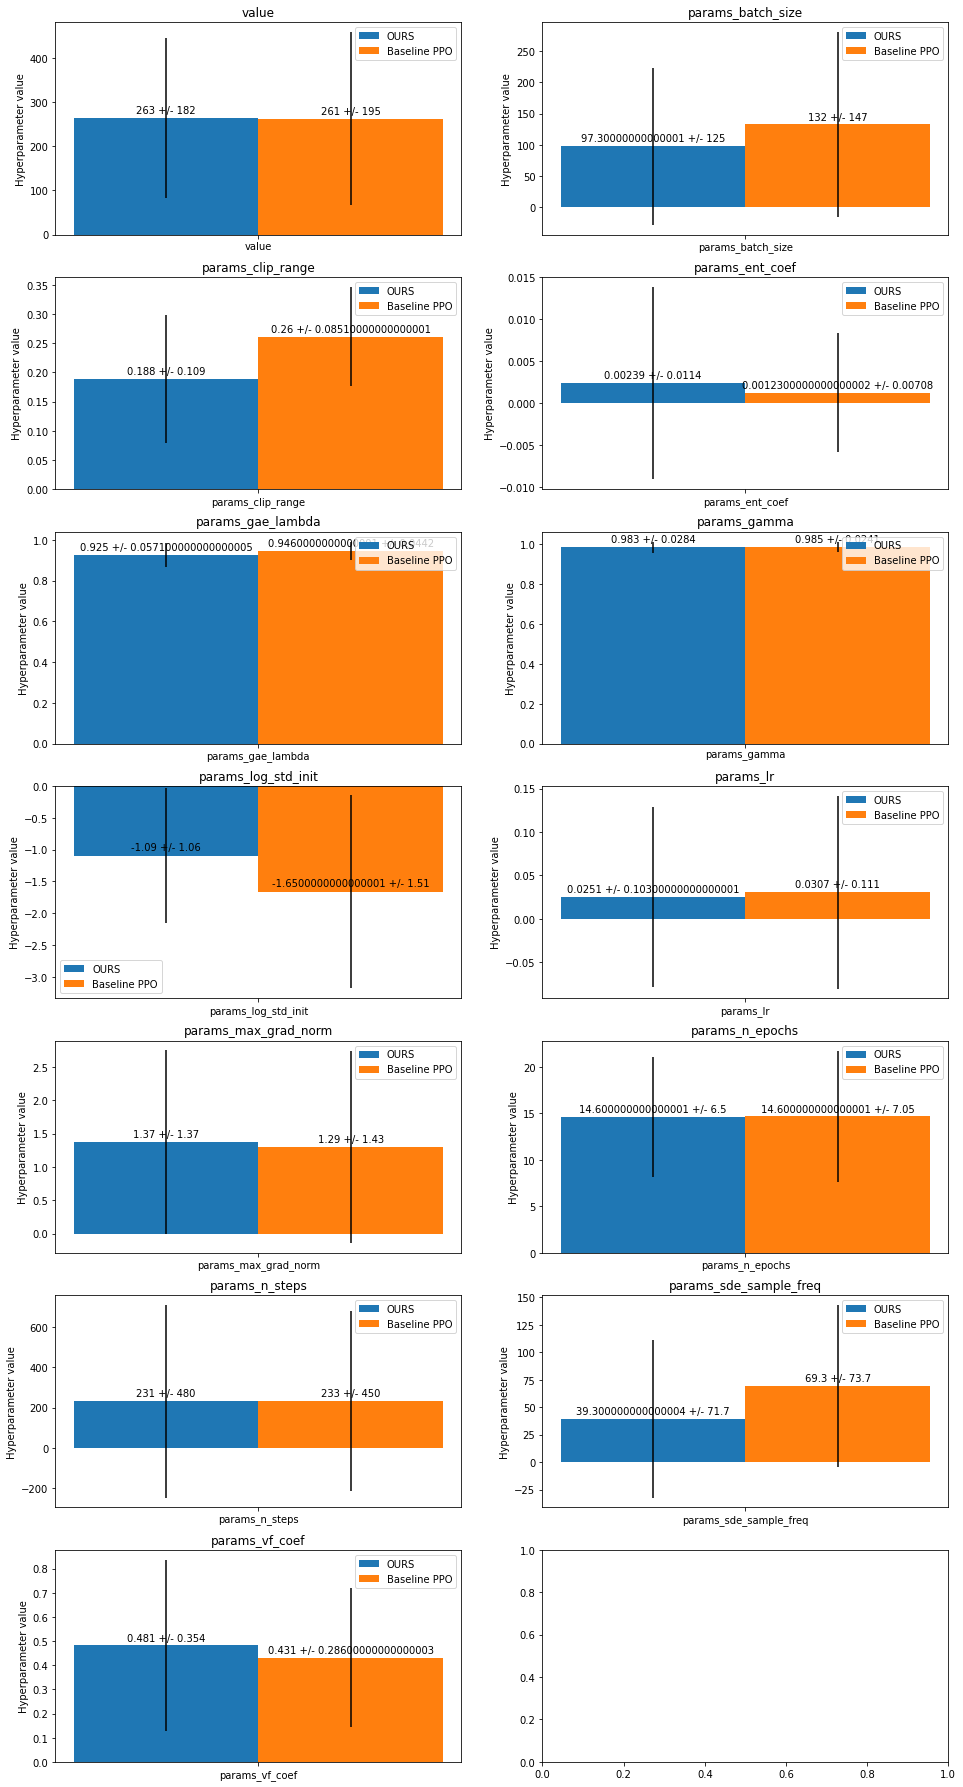

In [35]:
fig, axs = plt.subplots(NUM_ROWS, NUM_COLUMNS, figsize=(16, 32))
for counter, value_name in enumerate(chart_names):
    row_idx = counter // NUM_COLUMNS
    column_idx = counter % NUM_COLUMNS
    
    label = [value_name]
    ours_value = np.array([ours.describe()[value_name]["mean"]])
    ours_std = np.array([ours.describe()[value_name]["std"]])
    #df_std /= df_value

    x = np.array([0.5])
    width  = 0.12
    
    ax = axs[row_idx,column_idx]
    
    rect1 = ax.bar(x-width/2, ours_value, width, label = "OURS", yerr = ours_std)

    if value_name in df2.describe():
        ppo_value = np.array([ppo.describe()[value_name]["mean"]])
        ppo_std =  np.array([ppo.describe()[value_name]["std"]])
        #f2_std /= df2_value
        rect2 = ax.bar(x+width/2, ppo_value, width, label = "Baseline PPO", yerr = ppo_std)
    
    autolabel(rect1, ours_std)
    autolabel(rect2, ppo_std)
    ax.set_ylabel("Hyperparameter value")
    ax.set_title(value_name)
    ax.set_xticks(x)
    ax.set_xticklabels(label)
    ax.legend()

#### Top 25% comparison

In [36]:
#OURS dataframe to compare
ours = df_75
ppo = df2_75

chart_names = []
for i in ppo:
    datatype = ppo[i].dtype
    if datatype == object:
        continue
    elif i == "Unnamed: 0":
        continue
    elif i == "number":
        continue
    else :
        chart_names.append(i)
        
NUM_COLUMNS = 2 
NUM_ROWS = (len(chart_names) // NUM_COLUMNS) + 1

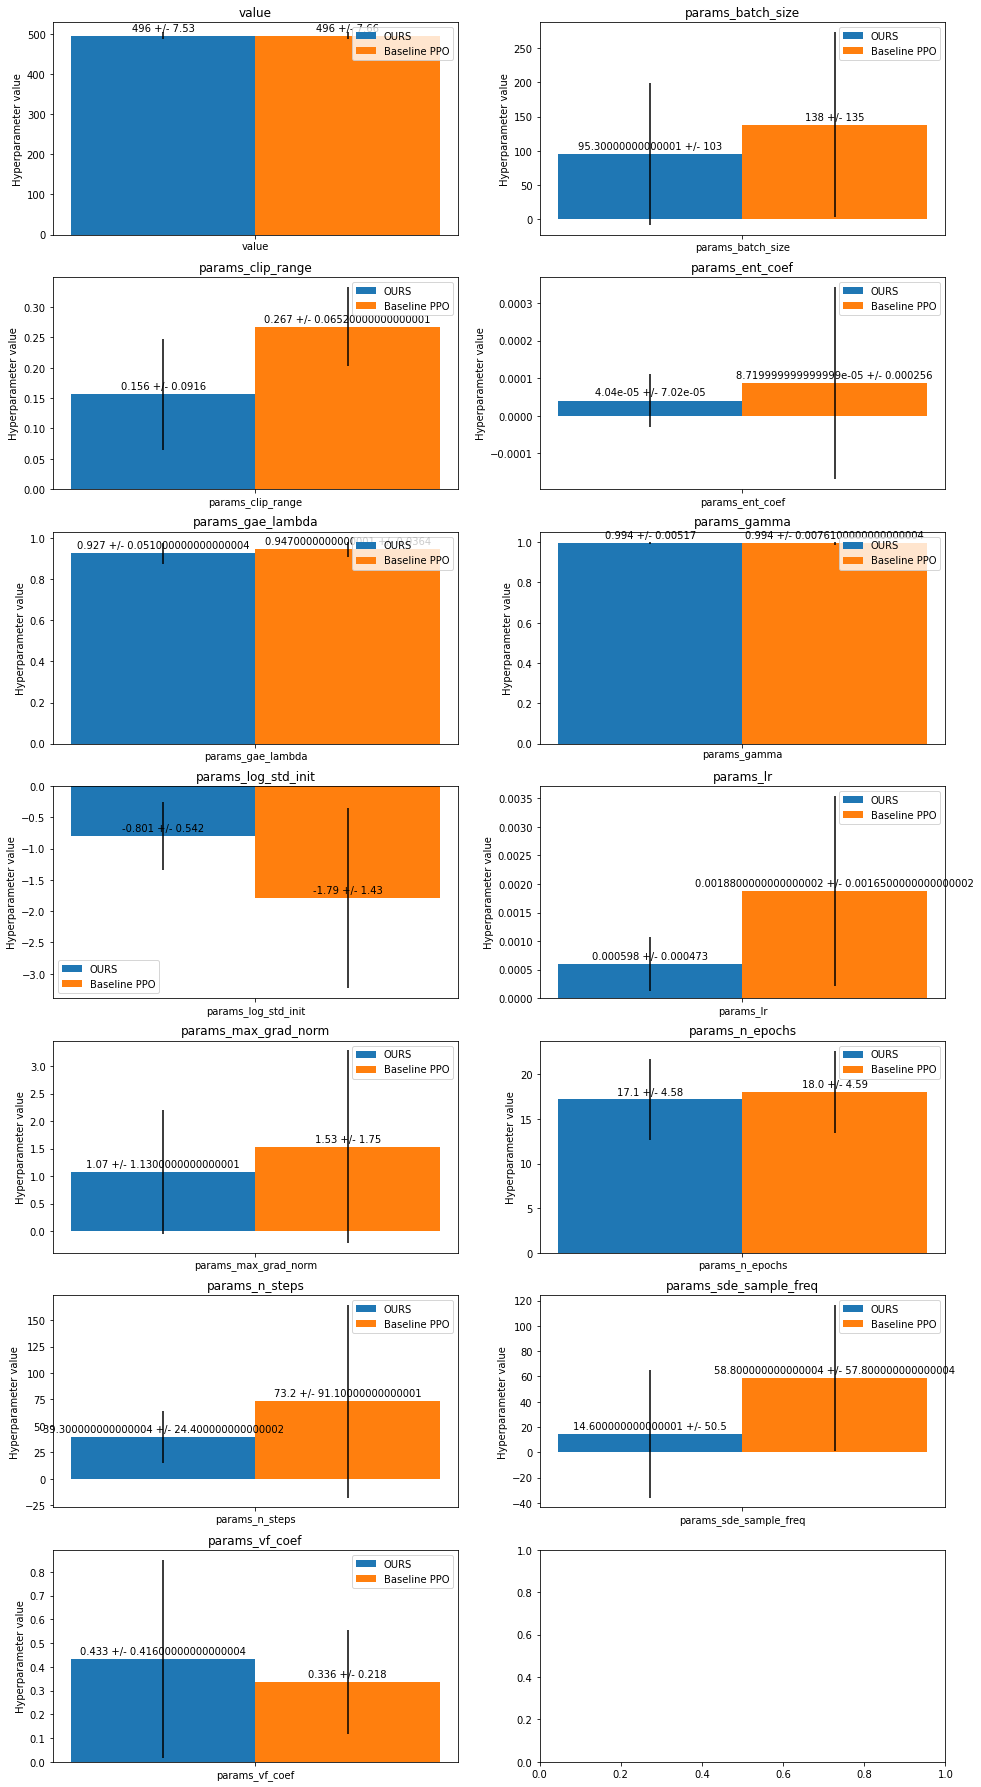

In [37]:
fig, axs = plt.subplots(NUM_ROWS, NUM_COLUMNS, figsize=(16, 32))
for counter, value_name in enumerate(chart_names):
    row_idx = counter // NUM_COLUMNS
    column_idx = counter % NUM_COLUMNS
    
    label = [value_name]
    ours_value = np.array([ours.describe()[value_name]["mean"]])
    ours_std = np.array([ours.describe()[value_name]["std"]])
    #df_std /= df_value

    x = np.array([0.5])
    width  = 0.12
    
    ax = axs[row_idx,column_idx]
    
    rect1 = ax.bar(x-width/2, ours_value, width, label = "OURS", yerr = ours_std)

    if value_name in df2.describe():
        ppo_value = np.array([ppo.describe()[value_name]["mean"]])
        ppo_std =  np.array([ppo.describe()[value_name]["std"]])
        #f2_std /= df2_value
        rect2 = ax.bar(x+width/2, ppo_value, width, label = "Baseline PPO", yerr = ppo_std)
    
    autolabel(rect1, ours_std)
    autolabel(rect2, ppo_std)
    ax.set_ylabel("Hyperparameter value")
    ax.set_title(value_name)
    ax.set_xticks(x)
    ax.set_xticklabels(label)
    ax.legend()

#### Global hyperparameters vs top 25% 
See how good hyperparameters behave vs less good ones

In [46]:
#OURS dataframe to compare
df_1 = df
df_2 = df_75

chart_names = []
for i in ours:
    datatype = ours[i].dtype
    if datatype == object:
        continue
    elif i == "Unnamed: 0":
        continue
    elif i == "number":
        continue
    else :
        chart_names.append(i)
        
NUM_COLUMNS = 2 
NUM_ROWS = (len(chart_names) // NUM_COLUMNS) + 1

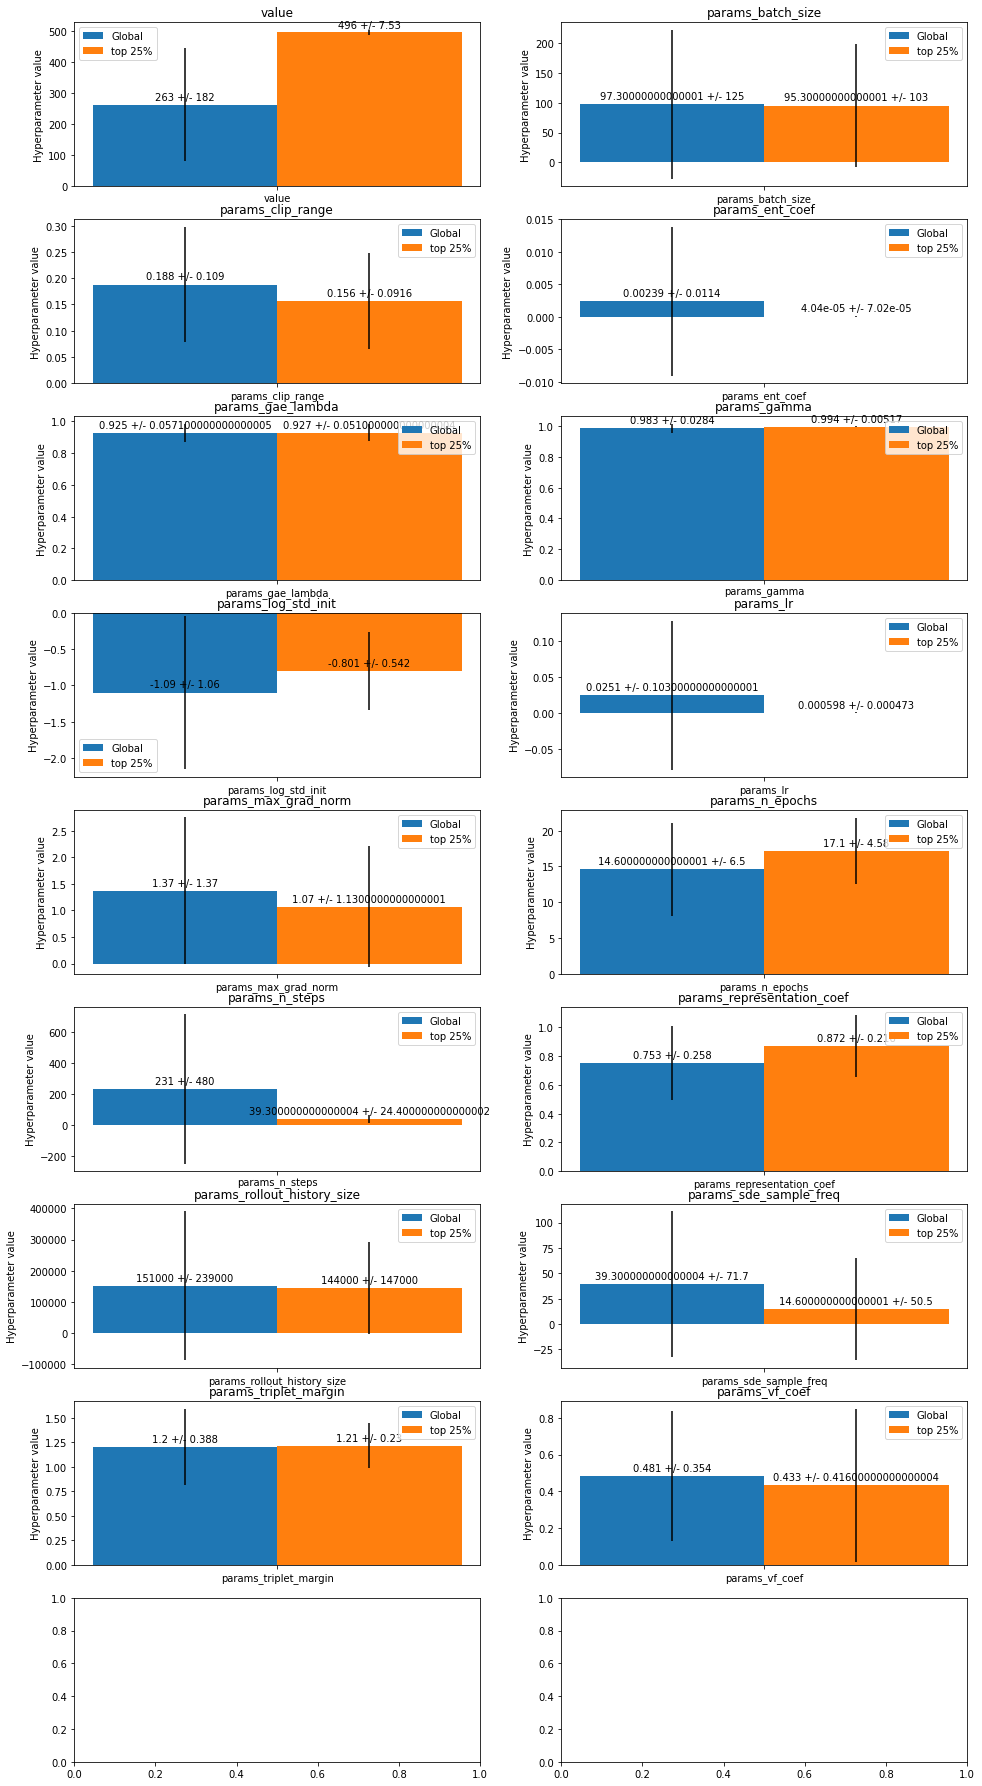

In [47]:
fig, axs = plt.subplots(NUM_ROWS, NUM_COLUMNS, figsize=(16, 32))
for counter, value_name in enumerate(chart_names):
    row_idx = counter // NUM_COLUMNS
    column_idx = counter % NUM_COLUMNS
    
    label = [value_name]
    df_1_value = np.array([df_1.describe()[value_name]["mean"]])
    df_1_std = np.array([df_1.describe()[value_name]["std"]])
    #df_std /= df_value

    x = np.array([0.5])
    width  = 0.12
    
    ax = axs[row_idx,column_idx]
    
    rect1 = ax.bar(x-width/2, df_1_value, width, label = "Global", yerr = df_1_std)

    if value_name in df_2.describe():
        df_2_value = np.array([df_2.describe()[value_name]["mean"]])
        df_2_std =  np.array([df_2.describe()[value_name]["std"]])
        #f2_std /= df2_value
        rect2 = ax.bar(x+width/2, df_2_value, width, label = "top 25%", yerr = df_2_std)
    
    autolabel(rect1, df_1_std)
    autolabel(rect2, df_2_std)
    ax.set_ylabel("Hyperparameter value")
    ax.set_title(value_name)
    ax.set_xticks(x)
    ax.set_xticklabels(label)
    ax.legend()